<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import yfinance
import yfinance as yf

# Get the data for the stock AMZN
start = '2014-09-17'

In [ ]:
# Amazon prediction

In [ ]:
# Bringing data from yfinance to dataframe - Amazon
df = yf.download('AMZN',start)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Bringing data into csv file
df.to_csv('amazon_data.csv', encoding='utf-8', index=False)

In [ ]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00-04:00,16.388000,16.400000,16.076000,16.200001,16.200001,82720000
2014-09-18 00:00:00-04:00,16.271999,16.355000,16.185499,16.250000,16.250000,51538000
2014-09-19 00:00:00-04:00,16.379999,16.638000,16.278500,16.566000,16.566000,137724000
2014-09-22 00:00:00-04:00,16.424500,16.474501,16.052999,16.225000,16.225000,62194000
2014-09-23 00:00:00-04:00,16.122999,16.379999,16.062500,16.181499,16.181499,47052000


In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

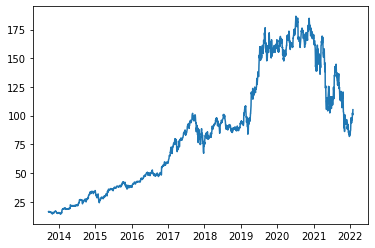

In [ ]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
# length of dataframe
len(df)

2109

In [ ]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [ ]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[16.200000762939453,
 16.25,
 16.56599998474121,
 16.225000381469727,
 16.181499481201172,
 16.410499572753906,
 16.096500396728516,
 16.160499572753906,
 16.090999603271484,
 16.121999740600586,
 15.873000144958496,
 15.920499801635742,
 16.136999130249023,
 16.110000610351562,
 15.848999977111816,
 16.135000228881836,
 15.768500328063965,
 15.569499969482422,
 15.322500228881836,
 15.415499687194824,
 15.298500061035156,
 15.142999649047852,
 15.182000160217285,
 15.310500144958496,
 15.766500473022461,
 15.648500442504883,
 15.659000396728516,
 14.352999687194824,
 14.498499870300293,
 14.779500007629395,
 14.706000328063965,
 14.953499794006348,
 15.27299976348877,
 15.28600025177002,
 15.14050006866455,
 14.826000213623047,
 14.831999778747559,
 14.993000030517578,
 15.255499839782715,
 15.600500106811523,
 15.575499534606934,
 15.824000358581543,
 16.391000747680664,
 16.15250015258789,
 16.24650001525879,
 16.32699966430664,
 16.527000427246094,
 16.631500244140625,
 16.78199958

In [ ]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[160.9324951171875,
 161.69949340820312,
 159.35049438476562,
 160.31100463867188,
 159.90049743652344,
 163.20550537109375,
 164.0574951171875,
 167.4824981689453,
 167.3415069580078,
 169.19349670410156,
 169.156494140625,
 170.7624969482422,
 174.46200561523438,
 174.34500122070312,
 172.697998046875,
 175.27200317382812,
 175.1909942626953,
 172.45399475097656,
 170.072998046875,
 172.1945037841797,
 172.40699768066406,
 172.00799560546875,
 171.64849853515625,
 175.5489959716797,
 183.78700256347656,
 184.82899475097656,
 186.57049560546875,
 185.9669952392578,
 185.92750549316406,
 183.8679962158203,
 184.08399963378906,
 181.55999755859375,
 178.68150329589844,
 177.47950744628906,
 178.6595001220703,
 179.25999450683594,
 181.90150451660156,
 182.83200073242188,
 184.99099731445312,
 181.3195037841797,
 181.51600646972656,
 179.99600219726562,
 166.37950134277344,
 166.57400512695312,
 168.31199645996094,
 167.73599243164062,
 168.79949951171875,
 167.2469940185547,
 167.093505

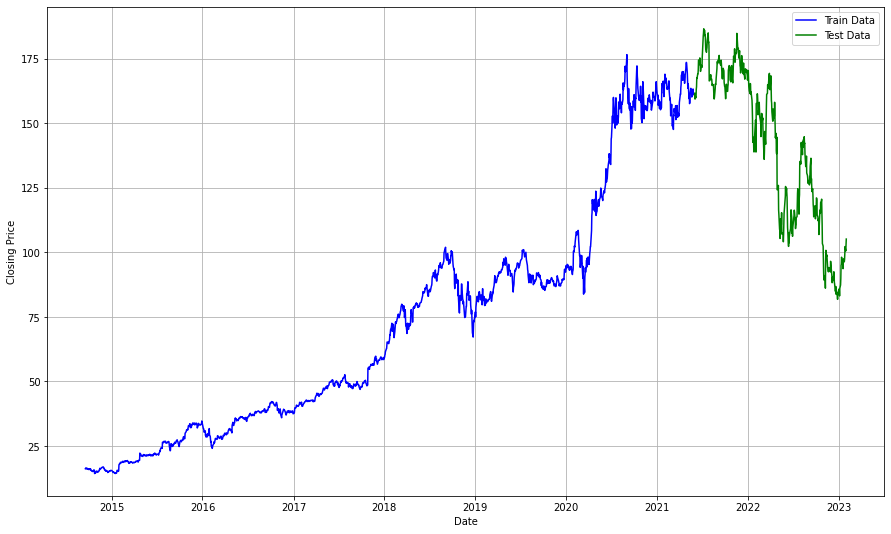

In [ ]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [ ]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [ ]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [ ]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2107
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -4601.024
Method:                       css-mle   S.D. of innovations              2.148
Date:                Thu, 02 Feb 2023   AIC                           9214.047
Time:                        02:45:11   BIC                           9247.966
Sample:                             1   HQIC                          9226.469
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0412      0.046      0.890      0.374      -0.050       0.132
ar.L1.D.y     -0.0150      0.022     -0.690      0.490      -0.058       0.028
ar.L2.D.y      0.0261      0.022      1.200      0.2

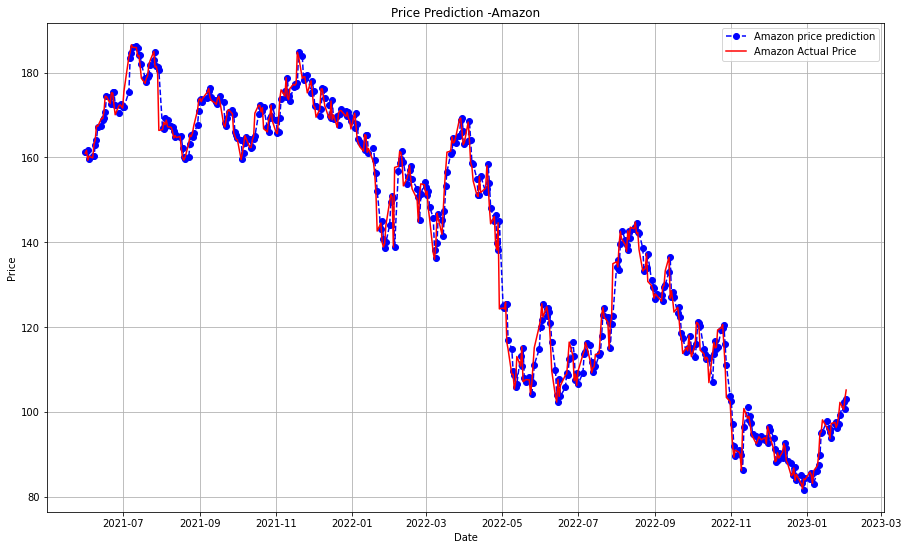

In [ ]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Amazon price prediction')
plt.plot(start_date, test, color ='red', label ='Amazon Actual Price')
plt.title('Price Prediction -Amazon')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.01920706230120564


MAPE of 1.9% implies the model is 98.1% accurate in predicting the test obeservations

In [ ]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 140.61106648377333
Mean Squared Error: 3.4977948480892147


In [ ]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 105.37890861754448
Prediction 160.76232565964196
Prediction 163.99506855432506
Prediction 156.4480821065365
Prediction 162.64515111643672
